
# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

We are choosing the datset of TMDb movie data for this project. This dataset contains information about approximately 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We will be considering answering the following questions from this dataset:

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. How are popularity and revenue correlated?
4. How are popularity and vote_average correlated?
5. How is runtime correlated with popularity, budget, and revenue?
6. Which year was best in terms of popularity, budget and revenue?
7. How are the trends of mean revenue, popularity, and budget over the years?

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [121]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [122]:
df.shape

(10866, 21)

We have 10866 rows and 21 columns in this dataset.

In [123]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The above cell shows the different columns present in this dataset.

In [124]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above cell describes the various statistical parameters of numeric variables in this dataset. We see that the variables budget, revenue, budget_adj, revenue_adj, and runtime have some values as 0. So we eliminate such rows from our dataset as they are not realistic. The following code helps us achieve that.

In [125]:
indexNames = df[(df['budget']==0) | (df['revenue']==0) | (df['runtime']==0) | (df['budget_adj']==0) | (df['revenue_adj']==0)].index
df.drop(indexNames, inplace=True)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 21 columns):
id                      3855 non-null int64
imdb_id                 3855 non-null object
popularity              3855 non-null float64
budget                  3855 non-null int64
revenue                 3855 non-null int64
original_title          3855 non-null object
cast                    3851 non-null object
homepage                1426 non-null object
director                3854 non-null object
tagline                 3575 non-null object
keywords                3717 non-null object
overview                3855 non-null object
runtime                 3855 non-null int64
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null object
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null flo

The above cell describes the number of non-null values for each column of this dataset. The following columns have missing values: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.

In [127]:
sum(df.duplicated())

1

We have one duplicate entry in this dataset.

### Removing duplicate entries

In [128]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [129]:
df.shape

(3854, 21)

### Dropping rows with null values

Since one of our questions is related to genres, which has missing values, we drop the rows having null values for genres using the code below.

In [130]:
df.dropna(subset=['genres'], inplace=True)
df.shape

(3854, 21)

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate analysis

We analyze the variables runtime, budget_adj, and revenue_adj using box-and-whisker plots and histograms as follows.

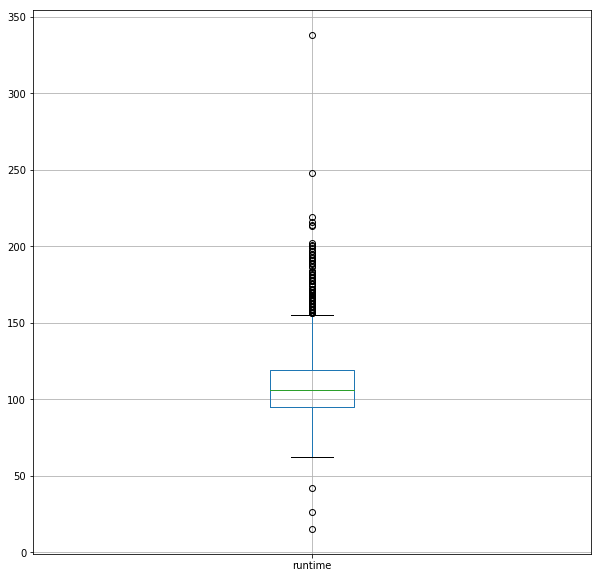

In [131]:
df.boxplot(column=['runtime'], figsize=(10,10))

In the plot for runtime above we see that there are quite a few values which extend beyond the whiskers and so are outliers.

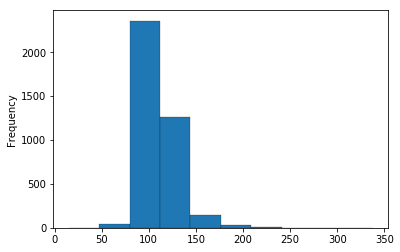

In [132]:
df['runtime'].plot(kind='hist', edgecolor='black', linewidth=0.2);

The plot above shows that most of the runtime values are between 80 and 140 and the distribution is almost normal.

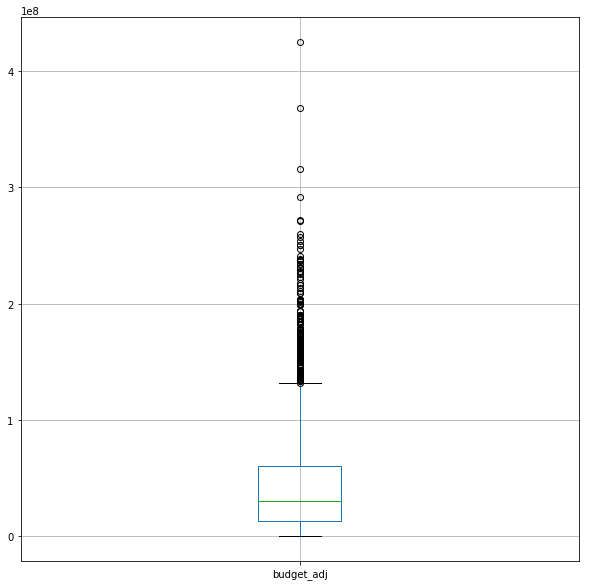

In [133]:
df.boxplot(column=['budget_adj'], figsize=(10,10))

In the plot for budget_adj above we see that there are quite a few values which extend beyond the whiskers and so are outliers.

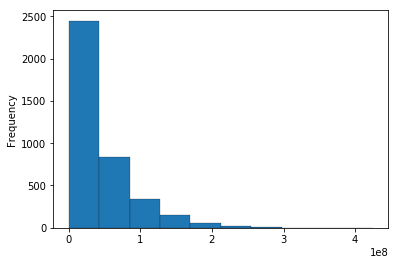

In [134]:
df['budget_adj'].plot(kind='hist', edgecolor='black', linewidth=0.2);

The plot above shows that the distribution of budget_adj is skewed towards the right and very few movies have higher budget.

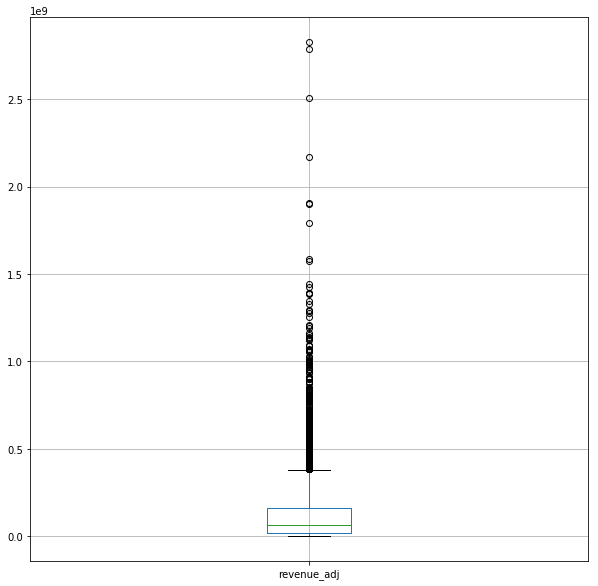

In [135]:
df.boxplot(column=['revenue_adj'], figsize=(10,10))

In the plot for revenue_adj above we see that there are quite a few values which extend beyond the whiskers and so are outliers.

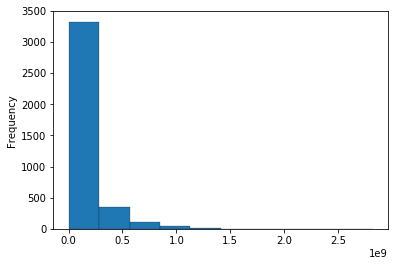

In [136]:
df['revenue_adj'].plot(kind='hist', edgecolor='black', linewidth=0.2);

The plot above shows that the distribution of revenue_adj is skewed towards the right and most of the movies have a revenue less than 0.6e9.

### Which genres are most popular from year to year?

In order to answer this question we need to group the movies by release year and find the maximum popularity score for each year using the code below.

In [137]:
yearly_max_popularity = df.groupby('release_year')['popularity'].max() 
for year in yearly_max_popularity.index:
    genre = df.query('popularity == {}'.format(yearly_max_popularity[year]))['genres']
    #print(str(genre.values[0]).split('|'))
    print('The genres most popular in year %d were %s' % (year, genre.values[0]))

The genres most popular in year 1960 were Drama|Horror|Thriller
The genres most popular in year 1961 were Adventure|Animation|Comedy|Family
The genres most popular in year 1962 were Adventure|Action|Thriller
The genres most popular in year 1963 were Action|Thriller|Adventure
The genres most popular in year 1964 were Adventure|Action|Thriller
The genres most popular in year 1965 were Adventure|Action|Thriller
The genres most popular in year 1966 were Drama
The genres most popular in year 1967 were Family|Animation|Adventure
The genres most popular in year 1968 were Science Fiction|Mystery|Adventure
The genres most popular in year 1969 were Adventure|Action|Thriller
The genres most popular in year 1970 were Animation|Comedy|Family|Adventure
The genres most popular in year 1971 were Science Fiction|Drama
The genres most popular in year 1972 were Drama|Crime
The genres most popular in year 1973 were Animation|Family
The genres most popular in year 1974 were Drama|Crime
The genres most popu

### What kinds of properties are associated with movies that have high revenues?

We create a new column called 'revenue_levels' where we split revenue_adj into four categories: low, medium, good and high. The following code helps achieve this.

In [159]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.370705, 1.834123e7, 6.171861e7, 1.632401e8, 2.827124e9]
# Labels for the four revenue level groups
bin_names = ['low', 'medium', 'good', 'high']
# Creates revenue_levels column
df['revenue_level'] = pd.cut(df['revenue_adj'], bin_edges, labels=bin_names)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,high
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,high


We can see how popularity affects revenue level by plotting the mean as shown below. We can create similar visualizations for budget, runtime, vote_count and vote_average.

Text(0.5,1,'Mean popularity based on revenue levels')

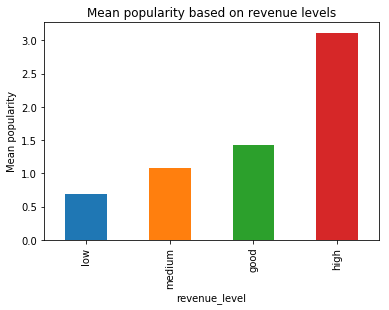

In [139]:
df_revenue_levels.groupby('revenue_level')['popularity'].mean().plot(kind='bar')
plt.ylabel('Mean popularity')
plt.title('Mean popularity based on revenue levels')

We can see from the above plot that movies which are more popular also have progressively greater revenues.

Text(0.5,1,'Mean adjusted budget based on revenue levels')

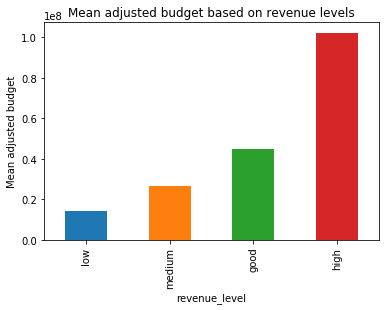

In [140]:
df_revenue_levels.groupby('revenue_level')['budget_adj'].mean().plot(kind='bar')
plt.ylabel('Mean adjusted budget')
plt.title('Mean adjusted budget based on revenue levels')

We can see from the above plot that movies which have greater revenues also have higher budgets.

Text(0.5,1,'Mean runtime based on revenue levels')

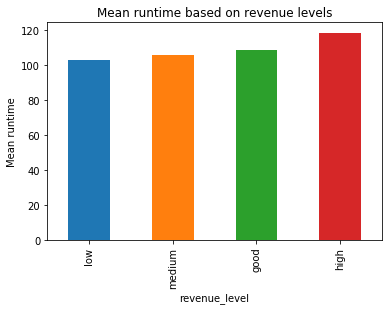

In [141]:
df_revenue_levels.groupby('revenue_level')['runtime'].mean().plot(kind='bar')
plt.ylabel('Mean runtime')
plt.title('Mean runtime based on revenue levels')

We can see from the above plot that movies which have greater runtime also have higher revenues. However, the difference in runtime is not so much (about 15 between low and high revenue levels) when compared to popularity and budget.

Text(0.5,1,'Mean vote count based on revenue levels')

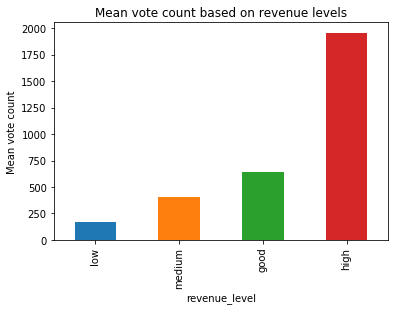

In [142]:
df_revenue_levels.groupby('revenue_level')['vote_count'].mean().plot(kind='bar')
plt.ylabel('Mean vote count')
plt.title('Mean vote count based on revenue levels')

We can see from the above plot that movies which have greater revenues also have higher vote counts. But the difference in vote count for high revenue levels is much greater than those among low, medium and good revenue levels.

### How are popularity and revenue correlated?

We use the following function to calculate correlation between two pandas Series.

In [143]:
def correlation(x, y):
    
    x_standard = (x - x.mean())/x.std(ddof=0)
    y_standard = (y - y.mean())/y.std(ddof=0)
    prod = x_standard*y_standard
    
    return prod.mean()


We find the relationship between popularity and revenue using a scatter plot and calculating Pearson's r using the function above.

Text(0.5,1,'Relationship between adjusted revenue and popularity')

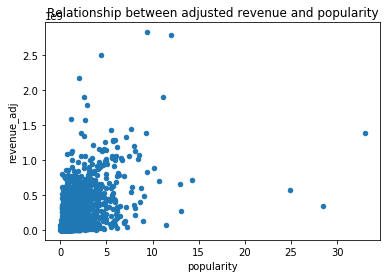

In [144]:
df.plot(x='popularity', y='revenue_adj', kind='scatter')
plt.title('Relationship between adjusted revenue and popularity')

In [145]:
print("Pearson's r between popularity and revenue = {}".format(correlation(df['popularity'], df['revenue_adj'])))

Pearson's r between popularity and revenue = 0.5469591846171397


We can see from the above scatter plot and correlation coefficient that there is a weak linear relationship between popularity and revenue. We also notice some points having very high popularity (three) and very high revenue (three) which are mostly likely outliers.

### How are popularity and vote_average correlated?

We find the relationship between popularity and vote_average using the scatter plot and calculating Pearson's r.

Text(0.5,1,'Relationship between average vote count and popularity')

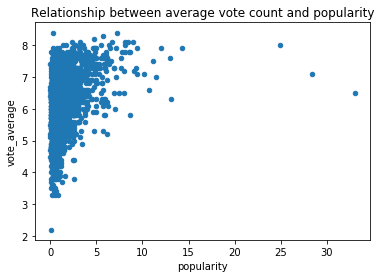

In [146]:
df.plot(x='popularity', y='vote_average', kind='scatter')
plt.title('Relationship between average vote count and popularity')

In [147]:
print("Pearson's r between popularity and revenue = {}".format(correlation(df['popularity'], df['vote_average'])))

Pearson's r between popularity and revenue = 0.3178661657227005


We can see from the above scatter plot and correlation coefficient that the relationship between popularity and vote_average is not linear. It tends to have a curvilinear relationship for higher values of popularity. We also notice three points where popularity is beyond 20 which are most likely outliers.

### How is runtime correlated with popularity, budget, and revenue?

We plot each of the above variables against runtime using the code below and also calculate Pearson's r.

Text(0.5,1,'Relationship between runtime and popularity')

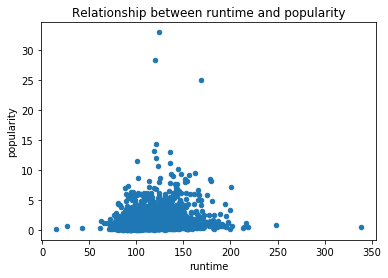

In [148]:
df.plot(x='runtime', y='popularity', kind='scatter')
plt.title('Relationship between runtime and popularity')

In [149]:
print("Pearson's r between runtime and popularity = {}".format(correlation(df['runtime'], df['popularity'])))

Pearson's r between runtime and popularity = 0.21509241430604203


We see from the above scatter plot that there is no clear relationship between popularity and runtime. This is also confirmed by the correlation coefficient which is close to zero. The most popular movies have a runtime around 125. There are seven points (two with very low runtime, two with very high runtime, and three with very high popularity) which seem to be outliers.

Text(0.5,1,'Relationship between runtime and adjusted budget')

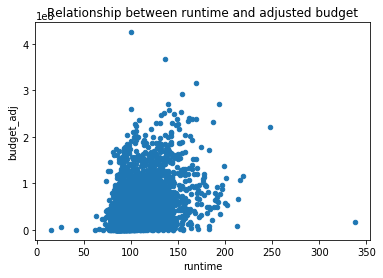

In [150]:
df.plot(x='runtime', y='budget_adj', kind='scatter')
plt.title('Relationship between runtime and adjusted budget')

In [151]:
print("Pearson's r between runtime and adjusted budget = {}".format(correlation(df['runtime'], df['budget_adj'])))

Pearson's r between runtime and adjusted budget = 0.3339759948002556


We can see from the above scatter plot the relationship between runtime and adjusted budget is not very well defined. There are a few outlier points also (maybe six). The correlation coefficient also shows a non-linear relationship but positive correlation. 

Text(0.5,1,'Relationship between runtime and adjusted revenue')

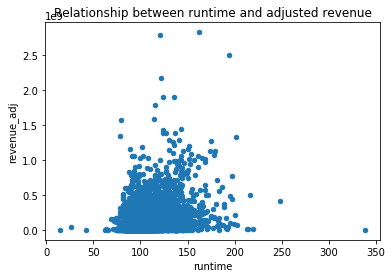

In [152]:
df.plot(x='runtime', y='revenue_adj', kind='scatter')
plt.title('Relationship between runtime and adjusted revenue')

In [153]:
print("Pearson's r between runtime and adjusted revenue = {}".format(correlation(df['runtime'], df['revenue_adj'])))

Pearson's r between runtime and adjusted revenue = 0.28050477723859524


Again, the above scatter plot shows a non-linear relationship between adjusted revenue and runtime. There are probably seven outlier points in this plot. The correlation coefficient indicates that runtime and adjusted revenue are positively correlated.

### Which year was best in terms of popularity, budget, and revenue?

We use the following code to calculate the year of maximum mean popularity, minimum mean budget and maximum mean revenue for different years.

In [154]:
yearly_mean_popularity = df.groupby('release_year')['popularity'].mean()
yearly_mean_budget = df.groupby('release_year')['budget_adj'].mean()
yearly_mean_revenue = df.groupby('release_year')['revenue_adj'].mean()

In [155]:
print('The year with maximum mean popularity: {}'.format(yearly_mean_popularity.idxmax()))
print('The year with minimum mean budget: {}'.format(yearly_mean_budget.idxmin()))
print('The year with maximum mean revenue: {}'.format(yearly_mean_revenue.idxmax()))

The year with maximum mean popularity: 2015
The year with minimum mean budget: 1972
The year with maximum mean revenue: 1965


### How are the trends of mean revenue, popularity, and budget over the years?

We plot the line chart of the above variables over the years as below.

Text(0.5,1,'Mean popularity trend over the years')

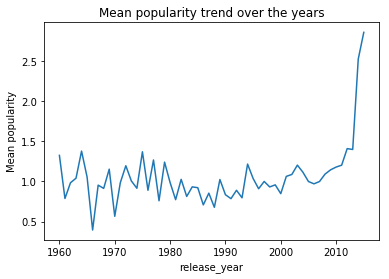

In [156]:
yearly_mean_popularity.plot()
plt.ylabel('Mean popularity')
plt.title('Mean popularity trend over the years')

The above plot shows that the popularity mostly fluctuates around 1 to 1.3 till the year 2010. After 2010, it has a sharp increase.

Text(0.5,1,'Mean budget trend over the years')

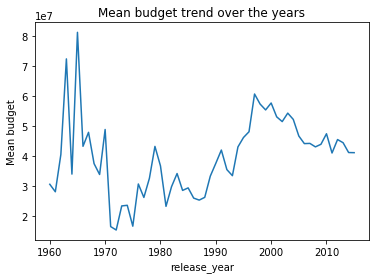

In [157]:
yearly_mean_budget.plot()
plt.ylabel('Mean budget')
plt.title('Mean budget trend over the years')

The above plot shows a mixed trend for budget over the years. It had two peaks around the year 1965, and went down drastically around 1972. After that it had an overall increase till the year 1998 and then decreased thereafter.

Text(0.5,1,'Mean revenue trend over the years')

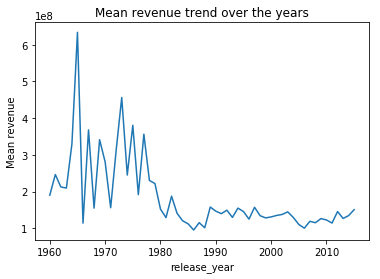

In [158]:
yearly_mean_revenue.plot()
plt.ylabel('Mean revenue')
plt.title('Mean revenue trend over the years')

The above plot shows that the revenue had a lot of ups and downs till the year 1980. There were few peaks and valleys till the year 1980. After 1990 it was mostly hovering around the value of 1.5e8.

<a id='conclusions'></a>
## Conclusions

According to our exploration of the dataset using various plots and statistics, we come to the following conclusions for the questions posed before:

1. The genres most popular from year to year are printed in the previous section on <a href="#eda">Exploratory Data Analysis</a>.
2. Movies that have a high revenue have higher average popularity, higher average budget, longer average runtime, and higher average vote count.
3. The correlation coefficient (0.55) and plot of revenue vs. popularity shows a weak positive linear correlation. 
4. The relationship of vote_average and popularity is curvilinear according to the plot and correlation coefficient.
5. The correlation coefficients of popularity, budget, and revenue vs. runtime are all close to 0. So none of these variables are linearly correlated with runtime. The plots also confirm this.
6. The best years in terms of popularity, budget and revenue are printed in the previous section on <a href="#eda">Exploratory Data Analysis</a>.
7. The popularity tends to have few fluctuations over the years (with few ups and downs), and really shoots up after 2010. The budget has a mixed trend till the year 1998 and an overall decrease after that. The revenue has a lot of ups and downs till the year 1980 and then has a few fluctuations around 1.5e8 after that.

### Limitations of our analysis

As we saw in our univariate analysis of the variables runtime, budget_adj and revenue_adj, we have some outlier points. The variable popularity can also have outlier points, which will affect our results of the first question. We also mentioned some outlier points in scatter plots when doing the bivariate analysis to figure out the relationship between different variables. So these outlier points can affect the conclusions of our findings for questions 3, 4, 5, 6 and 7. 

<a id='references'></a>
## References

- Intro to Data Analysis (free udacity course).
- https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html